In [59]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.colors import to_hex,to_rgb,to_rgba

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram
from atoms_transfer import stern_limbach

In [60]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution")

if not working_dir.exists():
    raise FileNotFoundError(f"{working_dir} does not exist")


In [61]:
dir_water: Path = working_dir / "files_xyz" / "others" / "water"

files_ice: list = glob(str(dir_water / "ice_ih" / "w_iceih.xyz"))
files_water4: list = glob(str(dir_water / "w4" / "w*.xyz"))
files_water5: list = glob(str(dir_water / "w5" / "w*.xyz"))
files_water6: list = glob(str(dir_water / "w6" / "w*.xyz"))
# files_water7: list = glob(str(dir_water / "w7" / "w*.xyz"))
files_water7: list = glob(str(dir_water / "w*" / "w*.xyz"))

coordinates_ice: list = functions.dict_coordinates_xyz(files_ice)
coordinates_water4: list = functions.dict_coordinates_xyz(files_water4)
coordinates_water5: list = functions.dict_coordinates_xyz(files_water5)
coordinates_water6: list = functions.dict_coordinates_xyz(files_water6)
coordinates_water7: list = functions.dict_coordinates_xyz(files_water7)

dir_zora: Path = working_dir / "zora_so"
files_w1: list = glob(str(dir_zora / "w1s*.xyz"))
files_w2: list = glob(str(dir_zora / "w2s*.xyz"))
files_w3: list = glob(str(dir_zora / "w3s*.xyz"))
files_w4: list = glob(str(dir_zora / "w4s*.xyz"))
files_w5: list = glob(str(dir_zora / "w5s*.xyz"))
files_w6: list = glob(str(dir_zora / "w6s*.xyz"))

coordinates_w1: dict = functions.dict_coordinates_xyz(files_w1)
coordinates_w2: dict = functions.dict_coordinates_xyz(files_w2)
coordinates_w3: dict = functions.dict_coordinates_xyz(files_w3)
coordinates_w4: dict = functions.dict_coordinates_xyz(files_w4)
coordinates_w5: dict = functions.dict_coordinates_xyz(files_w5)
coordinates_w6: dict = functions.dict_coordinates_xyz(files_w6)

coordinates_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   element  x-coordinate  y-coordinate  z-coordinate
 0      Hg     -0.225130      0.010739       0.00000
 1       O      1.821376     -0.090165       0.00000
 2       H      2.325945      0.187310       0.79892
 3       H      2.325945      0.177310      -0.79892}

In [62]:
dir_other: Path = working_dir / "files_xyz"

files_hf: list = glob(str(dir_other / "hf" / "*.xyz"))
files_pbe0: list = glob(str(dir_other / "pbe0" / "*.xyz"))
files_camb3lyp: list = glob(str(dir_other / "camb3lyp" / "*.xyz"))
files_wb97xd: list = glob(str(dir_other / "wb97xd_grimmeD2" / "*.xyz"))
files_b2plypd3: list = glob(str(dir_other / "b2plypd3" / "*.xyz"))
files_pbeqidh: list = glob(str(dir_other / "pbeqidh" / "*.xyz"))
files_mp2: list = glob(str(dir_other / "mp2" / "*.xyz"))
files_zora_nr: list = glob(str(dir_other / "zora" / "c" / "*.xyz"))
files_zora_sr: list = glob(str(dir_other / "zora" / "sr" / "*.xyz"))
files_zora_so: list = glob(str(dir_other / "zora" / "so" / "*.xyz"))


coordinates_hf: dict = functions.dict_coordinates_xyz(files_hf)
coordinates_pbe0: dict = functions.dict_coordinates_xyz(files_pbe0)
coordinates_camb3lyp: dict = functions.dict_coordinates_xyz(files_camb3lyp)
coordinates_wb97xd: dict = functions.dict_coordinates_xyz(files_wb97xd)
coordinates_b2plypd3: dict = functions.dict_coordinates_xyz(files_b2plypd3)
coordinates_pbeqidh: dict = functions.dict_coordinates_xyz(files_pbeqidh)
coordinates_mp2: dict = functions.dict_coordinates_xyz(files_mp2)
coordinates_zora_nr: dict = functions.dict_coordinates_xyz(files_zora_nr)
coordinates_zora_sr: dict = functions.dict_coordinates_xyz(files_zora_sr)
coordinates_zora_so: dict = functions.dict_coordinates_xyz(files_zora_so)


In [63]:
distances_dict_ice: dict = distance_matrix.distance_matrix(coordinates_ice, (0, 0, 0))
distances_dict_water4: dict = distance_matrix.distance_matrix(
    coordinates_water4, (0, 0, 0)
)
distances_dict_water5: dict = distance_matrix.distance_matrix(
    coordinates_water5, (0, 0, 0)
)
distances_dict_water6: dict = distance_matrix.distance_matrix(
    coordinates_water6, (0, 0, 0)
)
distances_dict_water7: dict = distance_matrix.distance_matrix(
    coordinates_water7, (0, 0, 0)
)

distances_dict_hf: dict = distance_matrix.distance_matrix(coordinates_hf, (0, 0, 0))
distances_dict_pbe0: dict = distance_matrix.distance_matrix(coordinates_pbe0, (0, 0, 0))
distances_dict_camb3lyp: dict = distance_matrix.distance_matrix(
    coordinates_camb3lyp, (0, 0, 0)
)
distances_dict_wb97xd: dict = distance_matrix.distance_matrix(
    coordinates_wb97xd, (0, 0, 0)
)
distances_dict_b2plypd3: dict = distance_matrix.distance_matrix(
    coordinates_b2plypd3, (0, 0, 0)
)
distances_dict_pbeqidh: dict = distance_matrix.distance_matrix(
    coordinates_pbeqidh, (0, 0, 0)
)
distances_dict_mp2: dict = distance_matrix.distance_matrix(coordinates_mp2, (0, 0, 0))

distances_dict_zora_nr: dict = distance_matrix.distance_matrix(
    coordinates_zora_nr, (0, 0, 0)
)
distances_dict_zora_sr: dict = distance_matrix.distance_matrix(
    coordinates_zora_sr, (0, 0, 0)
)
distances_dict_zora_so: dict = distance_matrix.distance_matrix(
    coordinates_zora_so, (0, 0, 0)
)

distances_dict_mp2


{'/home/edison/repositories/radial_distribution/files_xyz/mp2/w5s7.xyz':    atoms         0         1         2         3         4         5  \
 0     Hg  0.000000  2.383257  2.989609  3.058074  2.151334  2.816800   
 1      O  2.383257  0.000000  0.966285  0.966598  2.860677  3.770227   
 2      H  2.989609  0.966285  0.000000  1.536827  3.399089  4.352765   
 3      H  3.058074  0.966598  1.536827  0.000000  3.579619  4.410336   
 4      O  2.151334  2.860677  3.399089  3.579619  0.000000  0.968779   
 5      H  2.816800  3.770227  4.352765  4.410336  0.968779  0.000000   
 6      H  2.708972  2.555218  3.071155  3.155471  0.969210  1.563908   
 7      O  3.913819  5.703443  6.481171  5.849703  5.387064  5.461692   
 8      H  4.532217  6.506715  7.254153  6.725388  5.928466  5.910116   
 9      H  4.578106  6.092433  6.892944  6.091536  6.059518  6.158283   
 10     O  2.041075  3.767066  4.361907  4.095809  4.090583  4.559660   
 11     H  2.776995  4.589384  5.283538  4.828828  4

In [64]:
grid = (0.8, 2, 0.01)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)


In [65]:
atoms_list: list = ["O", "H", "O"]  # proton transfer

atoms_index_dict_ice: dict = atoms_index_list.atoms_index_dict(
    distances_dict_ice, atoms_list, grid
)
atoms_index_dict_water4: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water4, atoms_list, grid
)
atoms_index_dict_water5: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water5, atoms_list, grid
)
atoms_index_dict_water6: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water6, atoms_list, grid
)
atoms_index_dict_water7: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water7, atoms_list, grid
)

atoms_index_dict_hf: dict = atoms_index_list.atoms_index_dict(
    distances_dict_hf, atoms_list, grid
)
atoms_index_dict_pbe0: dict = atoms_index_list.atoms_index_dict(
    distances_dict_pbe0, atoms_list, grid
)
atoms_index_dict_camb3lyp: dict = atoms_index_list.atoms_index_dict(
    distances_dict_camb3lyp, atoms_list, grid
)
atoms_index_dict_wb97xd: dict = atoms_index_list.atoms_index_dict(
    distances_dict_wb97xd, atoms_list, grid
)
atoms_index_dict_b2plypd3: dict = atoms_index_list.atoms_index_dict(
    distances_dict_b2plypd3, atoms_list, grid
)
atoms_index_dict_pbeqidh: dict = atoms_index_list.atoms_index_dict(
    distances_dict_pbeqidh, atoms_list, grid
)
atoms_index_dict_mp2: dict = atoms_index_list.atoms_index_dict(
    distances_dict_mp2, atoms_list, grid
)
atoms_index_dict_zora_nr: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_nr, atoms_list, grid
)
atoms_index_dict_zora_sr: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_sr, atoms_list, grid
)
atoms_index_dict_zora_so: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_so, atoms_list, grid
)

atoms_index_dict_wb97xd


{'/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w6s17.xyz': [(7,
   17,
   16),
  (10, 18, 16)],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w5s7.xyz': [(7,
   11,
   10)],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w2s1.xyz': [],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w5s5.xyz': [(4,
   5,
   7),
  (10, 12, 13)],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w4s3.xyz': [(1,
   9,
   10),
  (4, 5, 10)],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w5s8.xyz': [],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w6s12.xyz': [(1,
   8,
   7),
  (4, 5, 13),
  (7, 6, 16),
  (10, 9, 16)],
 '/home/edison/repositories/radial_distribution/files_xyz/wb97xd_grimmeD2/w6s24.xyz': [(1,
   0,
   13),
  (1, 5, 4),
  (7, 8, 13),
  (7, 11, 10)],
 '/home/edison/repositories/radial_distribution/files_xyz/

In [66]:
transfer_ice: list = stern_limbach(atoms_index_dict_ice, atoms_list, distances_dict_ice)
transfer_water4: list = stern_limbach(
    atoms_index_dict_water4, atoms_list, distances_dict_water4
)
transfer_water5: list = stern_limbach(
    atoms_index_dict_water5, atoms_list, distances_dict_water5
)
transfer_water6: list = stern_limbach(
    atoms_index_dict_water6, atoms_list, distances_dict_water6
)
transfer_water7: list = stern_limbach(
    atoms_index_dict_water7, atoms_list, distances_dict_water7
)

transfer_hf: list = stern_limbach(atoms_index_dict_hf, atoms_list, distances_dict_hf)
transfer_pbe0: list = stern_limbach(
    atoms_index_dict_pbe0, atoms_list, distances_dict_pbe0
)
transfer_camb3lyp: list = stern_limbach(
    atoms_index_dict_camb3lyp, atoms_list, distances_dict_camb3lyp
)
transfer_wb97xd: list = stern_limbach(
    atoms_index_dict_wb97xd, atoms_list, distances_dict_wb97xd
)
transfer_b2plypd3: list = stern_limbach(
    atoms_index_dict_b2plypd3, atoms_list, distances_dict_b2plypd3
)
transfer_pbeqidh: list = stern_limbach(
    atoms_index_dict_pbeqidh, atoms_list, distances_dict_pbeqidh
)
transfer_mp2: list = stern_limbach(atoms_index_dict_mp2, atoms_list, distances_dict_mp2)

transfer_zora_nr: list = stern_limbach(
    atoms_index_dict_zora_nr, atoms_list, distances_dict_zora_nr
)
transfer_zora_sr: list = stern_limbach(
    atoms_index_dict_zora_sr, atoms_list, distances_dict_zora_sr
)
transfer_zora_so: list = stern_limbach(
    atoms_index_dict_zora_so, atoms_list, distances_dict_zora_so
)


In [67]:
transfer_mp2


{'q1': [0.14968211906910212,
  -0.10443211649886242,
  -0.10527898691107096,
  -0.008649318746002055,
  0.4393247767417406,
  -0.13020881071855062,
  -0.1284163488593848,
  0.19938289205413795,
  -0.15440684926957438,
  -0.2964622783912536,
  -0.4741882633892561,
  0.15087819134720293,
  -0.4743436360908872,
  0.151025900899162,
  -0.18989146925123068,
  -0.2157016926461055,
  -0.47995108366325756,
  -0.16745634407195675,
  0.13194063193602823,
  0.29201189934381633,
  0.2260410503011856,
  -0.22632858272400136,
  0.2586270927883145,
  0.21209623849855985,
  -0.31828278131742493,
  0.23689294925647575,
  0.1506240301135423,
  -0.2600122608483396,
  -0.07934663931382058,
  0.07940118449946354,
  0.28558133234649385,
  -0.19384116280937436,
  -0.12941882780697656,
  -0.28889339337032294,
  0.3009053077388173,
  0.21713852937300726,
  -0.11485773007563083,
  -0.02702705695723706,
  0.16143313290913175,
  0.24776498626748822,
  -0.22795537796904342,
  -0.22709624735024314,
  -0.36886723204

In [68]:
transfer_zora_nr

{'q1': [0.14968211906910212,
  -0.10443211649886242,
  -0.10527898691107096,
  -0.13020881071855062,
  -0.1284163488593848,
  -0.008649318746002055,
  0.4393247767417406,
  0.19938289205413795,
  -0.15440684926957438,
  -0.2964622783912536,
  -0.4741882633892561,
  0.15087819134720293,
  -0.4743436360908872,
  0.151025900899162,
  -0.20074538983955703,
  -0.19971188305976184,
  -0.20077418710737904,
  -0.19971291836366123,
  0.13194063193602823,
  0.29201189934381633,
  0.2260410503011856,
  -0.22632858272400136,
  -0.41775377759283305,
  -0.4350713312335787,
  0.1340514936134628,
  0.2586270927883145,
  0.22727864124435204,
  0.2310097917738293,
  0.23689294925647575,
  0.1506240301135423,
  -0.2600122608483396,
  0.2310247853659534,
  -0.22716586844058873,
  -0.12941882780697656,
  -0.28889339337032294,
  0.3009053077388173,
  -0.07934663931382058,
  0.07940118449946354,
  0.16143313290913175,
  0.24776498626748822,
  -0.11485773007563083,
  -0.02702705695723706,
  0.2171385293730072

In [69]:
# - saving histogram
distribution = np.linspace(rmin, rmax, nbins, endpoint=False)


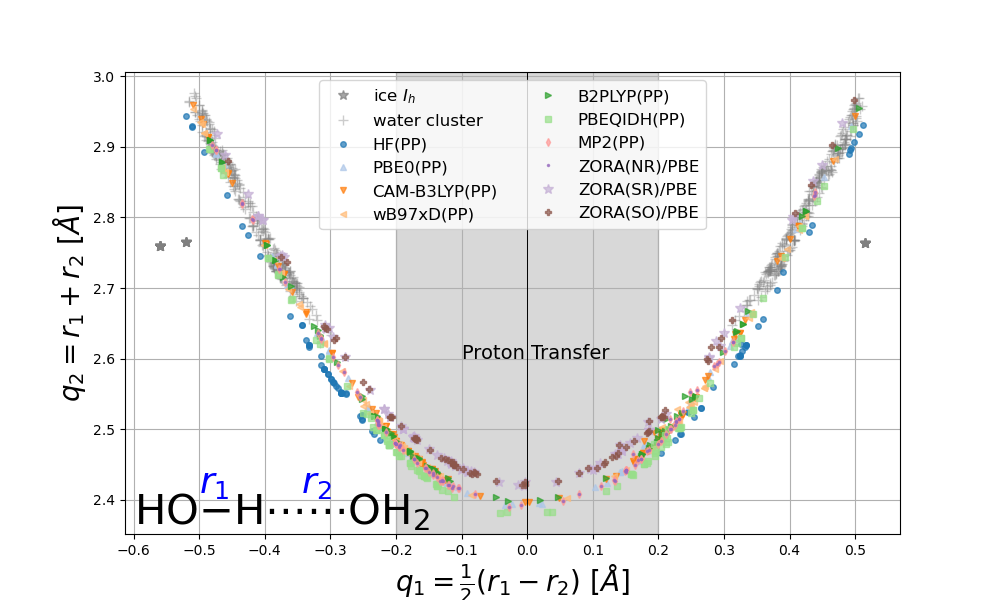

In [71]:
fig = plt.figure(figsize=(10, 6))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which="major")

# - lines style in a for loop
lines = ["o", "^", "v", "<", ">", "s", "d", ".", "*", "P", "D", "p", "8", "h", ".", "-", ":"]
# lines = ["-o", "-^", "-v", "-<", "->", "-s", "-d", "-*", "-P", "-D", "-p", "-8", "-h", "-.", "--", ":"]
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']

linecycler = cycle(lines)

# cm = cycle(
#     [
#         "#1f77b4",
#         "#ff7f0e",
#         "#2ca02c",
#         "#d62728",
#         "#9467bd",
#         "#8c564b",
#         "#e377c2",
#         "#7f7f7f",
#         "#bcbd22",
#         "#17becf",
#     ]
# )

color_palette = [to_hex(i) for i in plt.get_cmap('tab20', 18).colors]
cm = cycle(color_palette)

# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
# ax.axvline(x=0.96, color='black', linestyle='-', linewidth=1)

ax.plot(
    # -np.abs(transfer_ice["q1"]),
    transfer_ice["q1"],
    transfer_ice["q2"],
    "*",
    # next(linecycler),
    color="gray",
    label=r"ice $I_h$",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    # -np.abs(transfer_water7["q1"]),
    transfer_water7["q1"],
    transfer_water7["q2"],
    "+",
    # next(linecycler),
    color="gray",
    label="water cluster",
    markersize=7,
    alpha=0.4,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_hf["q1"],
    transfer_hf["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="HF(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_pbe0["q1"],
    transfer_pbe0["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="PBE0(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_camb3lyp["q1"],
    transfer_camb3lyp["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="CAM-B3LYP(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_wb97xd["q1"],
    transfer_wb97xd["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="wB97xD(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_b2plypd3["q1"],
    transfer_b2plypd3["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="B2PLYP(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_pbeqidh["q1"],
    transfer_pbeqidh["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="PBEQIDH(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_mp2["q1"],
    transfer_mp2["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="MP2(PP)",
    markersize=4,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_zora_nr["q1"],
    transfer_zora_nr["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="ZORA(NR)/PBE",
    markersize=3,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_zora_sr["q1"],
    transfer_zora_sr["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="ZORA(SR)/PBE",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    transfer_zora_so["q1"],
    transfer_zora_so["q2"],
    # "-",
    next(linecycler),
    color=next(cm),
    label="ZORA(SO)/PBE",
    markersize=5,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)



# plt.xlim(-0.6, 0.4)
# plt.ylim(0.001, 1.1)

ax.xaxis.set_major_locator(MultipleLocator(0.1))

# - legends for the main plot
ax.set_xlabel(r"$q_1=\frac{1}{2}(r_1-r_2) ~[\AA]$", fontsize=20)
ax.set_ylabel(r"$q_2=r_1+r_2 ~[\AA]$", fontsize=20)

plt.legend(loc="upper center", fontsize=12, ncol=2)

ax.annotate(
    f"Proton Transfer",
    xy=(-0.1, 2.6),
    xycoords="data",
    fontsize=14,
)

ax.axvspan(-0.2, 0.2, alpha=0.3, color="gray")
ax.axvline(x=0.0, color="black", linestyle="-", linewidth=0.7)

ax.annotate(
    # f'{atoms_list[0]}'r'$-$'f'{atoms_list[1]}'r'$\cdots\to$'f'{atoms_list[0]}',
    r"HO$-$H$\cdots\cdots$OH$_2$",
    xy=(-0.6, 2.365),
    xycoords="data",
    fontsize=30,
    # weight="bold",
)

ax.annotate(
    # f'{atoms_list[0]}'r'$-$'f'{atoms_list[1]}'r'$\cdots\to$'f'{atoms_list[0]}',
    r"$r_1 \qquad r_2$",
    xy=(-0.5, 2.41),
    xycoords="data",
    fontsize=26,
    weight="bold",
    color="blue"
)

fig.savefig(
    working_dir / "stern_limbach_gaussian.pdf",
    dpi=500,
    bbox_inches="tight",
)
